
**Note**: In case there are problem with the zip file repair it from command line with:  
```python
zip -F sandbox_2017_ECMWF0_wind_forecasts.zip sandbox_2017_ECMWF0_wind_forecasts_repaired.zip
```

In [2]:
from utils import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
unpack_compressed_file('../sandbox_2017_ECMWF0_wind_forecasts.zip', '../')
os.remove('../sandbox_2017_ECMWF0_wind_forecasts.zip')

In [ ]:
files = find_files('../sandbox_2017_ECMWF0_wind_forecasts', suffix='.gz')
for file in files:
    unpack_compressed_file(file, file[0:-3])
    os.remove(file)

In [3]:
csv_files = find_files('../sandbox_2017_ECMWF0_wind_forecasts', suffix='.csv')
hdf_files = find_files('../WindSandbox2017', suffix='.h5')    

In [ ]:
for csv_file in csv_files:
    # remove 'exportForecasts-snap2017eur-ECMWF-' part--> 34 characters and .csv part
    short_name = csv_file.split('/')[-1][34:-4]
    if '0-20150101-20170707' not in short_name:
        print('incorrect name scheme of ', short_name, '?')
    else:
        short_name = short_name[0:-20] + '.h5'
        hdf_id = [idx for idx, name in enumerate(hdf_files) if short_name in name]
        
        

In [ ]:
dates = []
ids = []
for idx, f in enumerate(csv_files):
    df = pd.read_csv(f, sep=';', header=None)
    df.columns = ['name', 'model', 'sth', 'time', 'sth2', 'anothertime', 'PredictedPowerGeneration']
    convert_string_col_to_date(df, 'time')        
    #convert_string_col_to_date(df, 'anothertime')
    dates.append( df.time.iloc[-1])
    ids.append(idx)
    

import matplotlib.pylab as plt
plt.figure(figsize=(15,15))
plt.scatter(dates,ids)
plt.show()

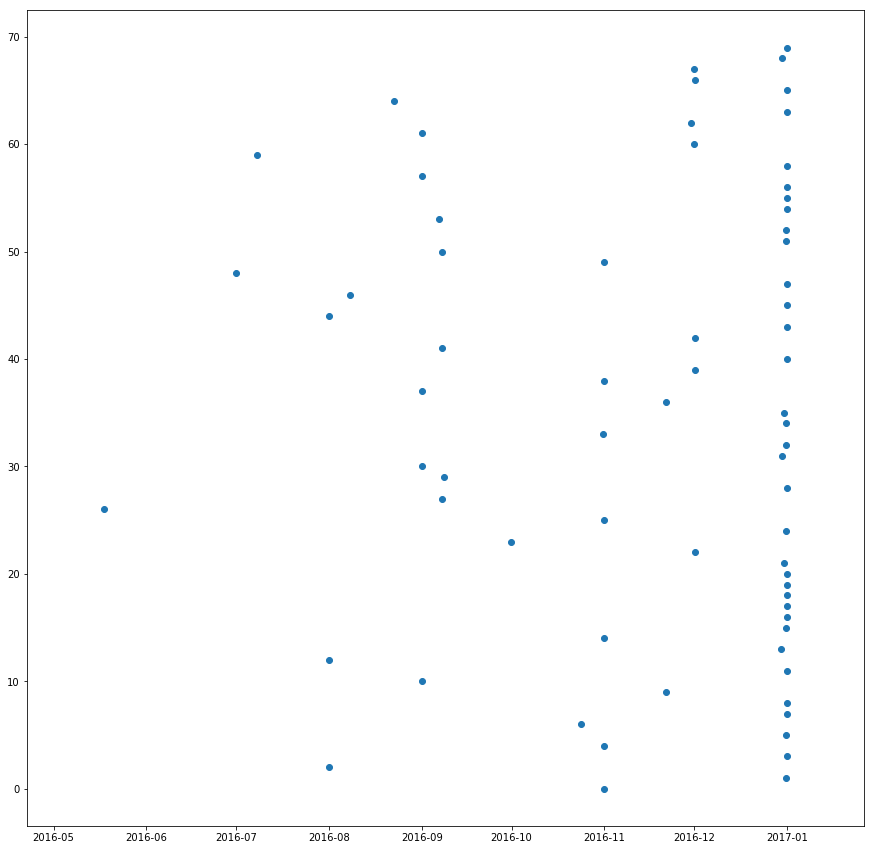